
### Comparison of Linear and Non Linear Machine Learning Predictive Models

#### Oriyomi Raheem

Subsurface Machine Learning Course,
Hildebrand Department of Petroleum and Geosystems Engineering, 
Cockrell School of Engineering,
The University of Texas at Austin.

##### [LinkedIn](https://www.linkedin.com/in/oriyomi-raheem-b221a760/)


_____________________

Workflow supervision and review by:

#### Instructor: Prof. Michael Pyrcz, Ph.D., P.Eng., Associate Professor, The University of Texas at Austin
##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Course TA: Ademide Mabadeje, Graduate Student, The University of Texas at Austin
##### [LinkedIn](https://www.linkedin.com/in/ademidemabadeje/)


### Executive Summary

* Linearity Regression assumptions - linearity, no multicollinearity, independence of error and homoscedasticity can pose difficulty in modelling. How do we incorporate flexibility, capture non-linearity and link a variance-bias trade off to build a robust model?
* Adopted datasets where the response feature has  linear and non-linear relationships with the predictor features and compare complexity using polynomial regression and k-Nearest Neighbors.
* Flexible ML algorithms used here can be used to model nonlinear data to a higher degree of accuracy compared to linear regression 
* Machine Learning models should be tested for linearity and flexibility by comparing a couple of predictive models. 



### Import Packages
We would need these packages for demonstration of linearity, so lets go ahead and import them.


In [1]:
import os                                                   # to set current working directory 
import math                                                 # basic calculations like square root
from sklearn.neighbors import KNeighborsRegressor           # for nearest k neighbours
from sklearn import metrics                                 # measures to check our models
from sklearn.model_selection import cross_val_score         # cross validation methods
import pandas as pd                                         # DataFrames and plotting
import pandas.plotting as pd_plot                           # plotting
import numpy as np                                          # arrays and matrix math
import matplotlib.pyplot as plt                             # plotting
from sklearn.model_selection import train_test_split        # train and test split
from sklearn.metrics import mean_squared_error              # statistical calculations
from subprocess import check_call                           # call defined check model
import scipy                                                # hermite polynomials
import scipy.stats as st                                    # statistical methods
from scipy.stats import gaussian_kde                        # plotting methods
from sklearn.linear_model import LinearRegression           # linear regression with scikit learn
from sklearn.preprocessing import PolynomialFeatures        # polynomial basis expansion
from scipy import stats                                     # statistical summary from a 2D ndarray
from sklearn.preprocessing import PolynomialFeatures        # Import polynomial features
from sklearn.pipeline import make_pipeline                  # import make pipeline features that simplifies polynomial prediction
from matplotlib.ticker import FuncFormatter                 # for good plotting
from sklearn.preprocessing import StandardScaler            # normalizing variables
from pandas import DataFrame,Series                         # dataframe to compare errors

### Functions
The visualize_model function is a simpler way of plotting and predicting concurrently. It helps make code very concise. It fits, predicts and plots in one go, awesome!!!.You can find more functions in Dr. Pyrcz's sample workflow [GitHub](https://github.com/GeostatsGuy)

In [2]:
# code taken from Dr. Michael Pyrcz's sample workflow  
def visualize_model(model,xfeature,x_min,x_max,yfeature,y_min,y_max,response,z_min,z_max,title,):# plots the data points and the prediction 
    n_classes = 10
    cmap = plt.cm.RdYlBu
    xplot_step = (x_max-x_min)/100; yplot_step = (y_max-y_min)/100
    xx, yy = np.meshgrid(np.arange(x_min, x_max, xplot_step),
                     np.arange(y_min, y_max, yplot_step))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap,vmin=z_min, vmax=z_max, levels=np.linspace(z_min, z_max, 100))

    im = plt.scatter(xfeature,yfeature,s=None, c=response, marker=None, cmap=cmap, norm=None, vmin=z_min, vmax=z_max, alpha=0.8, linewidths=0.3, edgecolors="black")
    plt.title(title)
    plt.xlabel(xfeature.name)
    plt.ylabel(yfeature.name)
    cbar = plt.colorbar(im, orientation = 'vertical')
    cbar.set_label(response.name, rotation=270, labelpad=20)  

### Comparison of Linear and Non Linear Machine Learning Predictive Models


1. Load Data

2. Data Organization

3. Preprocessing -  Normalization and Standardization

4. Separate to Train/Test

5. Model Training / Testing 

6. Create models with range of complexity and flexibility - Linear Regression, Orthogonal Polynomial and k-Nearest Neighbors

7. Hyperparameters Tuning

8. Iterate steps 5,6 & 7 to build a plot of Predictive Error versus Model Complexity, identifying underfitting, overfitting, ideal range of complexity, simple and complex hyperparameter tuning. 

9. Analysis of results


### 1 - Load Data

The following workflow applies the .csv file 'project.csv', an open data source from a field in Australia. The dataset is publically available [here](https://github.com/Yomzysteez/project/blob/main/project.csv/)  

Let's work with the following features:

* **Water Saturation** - The fraction of water in a given pore space
* **Gamma Ray** - electromagnetic radiation of the shortest wavelength and highest energy in units of API.
* **Neutron Porosity** - log of porosity based on the effect of the formation on fast neutrons emitted by a source.

```python
projectdata = pd.read_csv(r"https://raw.githubusercontent.com/Yomzysteez/project/main/project.csv") # load the comma delimited data file from Oriyomi's GitHub repository
```
Let's load the dataset with the pandas 'read_csv' function into a data frame we called 'projectdata' and then preview it by printing a slice and by utilizing the 'head' DataFrame member function (with a nice and clean format, see below).

In [3]:
projectdata = pd.read_csv(r"https://raw.githubusercontent.com/Yomzysteez/project/main/project.csv")
projectdata.head()

,DEPTH,GR,RLA1,RLA2,RLA3,RLA4,RLA5,RT_HRLT,RHOB,TNPH,Vsh,Sw,Por,LogRt,LogPhiT,LogSwT
0,2980.1820,83.0332,3.3322,3.6498,3.7865,3.9334,4.3403,4.8549,2.4286,0.2453,0.3238,0.8605,0.1462,1.579989,-0.835053,-0.065249
1,2984.9064,137.3272,5.6570,5.4885,5.6555,5.5542,5.5333,5.5653,2.4736,0.3809,0.7230,0.9337,0.0886,1.716551,-1.052566,-0.029793
2,2985.0588,120.0967,5.7486,5.8678,6.0911,6.0760,6.0759,6.2553,2.4308,0.3380,0.5963,0.7986,0.1172,1.833429,-0.931072,-0.097671
3,2985.2112,112.7201,4.7903,4.9646,5.1627,5.2615,5.2047,5.4646,2.3983,0.2993,0.5421,0.7762,0.1350,1.698291,-0.869666,-0.110026
4,2985.3636,111.8599,7.2593,7.6336,7.9604,8.3052,8.1057,8.7985,2.3867,0.2921,0.5357,0.5571,0.1391,2.174581,-0.856673,-0.254067


### 2 - Data Organization
To better organize our dataset so that the lowest possible values are 0.0 so they will be truncated, subsequently, get_numerical_data() will be used to get a shallow copy to enable usage in original data elsewhere.

In [4]:
num = projectdata._get_numeric_data()                           # get the numerical values
num[num < 0] = 0                                            # truncate negative values to 0.0
projectdata.describe().transpose()                              # calculate summary statistics for the data

,count,mean,std,min,25%,50%,75%,max
DEPTH,1158.0,3045.375857,28.779927,2980.182000,3024.125000,3046.790400,3067.948300,3095.000000
GR,1158.0,69.481161,28.421439,28.701700,45.473125,59.498000,89.720675,160.538600
RLA1,563.0,85.046588,110.549189,2.175200,7.329600,14.051400,167.733450,363.172800
RLA2,563.0,82.886003,108.440512,2.971000,9.855800,18.956700,136.953250,539.222800
RLA3,563.0,97.523164,128.896756,3.772100,11.601450,23.014100,155.862150,669.579000
RLA4,563.0,108.750528,144.786364,3.933400,12.755350,25.900800,165.171150,764.806800
RLA5,563.0,128.190778,173.271255,4.340300,14.323000,29.360100,194.702700,852.986600
RT_HRLT,563.0,165.982599,233.845087,4.734500,19.412500,37.870800,218.419400,1164.918900
RHOB,1158.0,2.250595,0.097606,2.040700,2.174950,2.242650,2.311800,2.520400
TNPH,1158.0,0.177386,0.065880,0.061700,0.129500,0.173800,0.226000,0.385000


### 3 - Preprocessing -  Normalization and Standardization

#### Two Predictor Features Were Used in This Analysis

Let's simplify the problem to 2 predictor features, Gamma Ray and Neutron Porosity to predict Water Saturation.  By working with only 2 features, it is very easy to visualize the segmentation of the feature space (it is only 2D and can be shown completely on a single plot).

The Linear Regression, Polynomial and k-nearest neighbour method  can all model with standardized. k-nearest neighbour method uses a nearest training sample search in feature space (like k-means clustering). To remove the impact feature range from the approach we standardize the features.

* we will standardize our predictor features to have a mean of zero and a variance of one.

* we use the scikit learn preprocessing to simplify this step and provide a reverse transform.

In [5]:
transform = StandardScaler();                                                        # instantiate standard scaling
features = ['GR','TNPH']                                                             # predictor features in dataframe
projectdata['sGR'] = transform.fit_transform(projectdata.loc[:,features].values)[:,0] # standardize the data features to mean = 0, var = 1.0
projectdata['sTNPH'] = transform.fit_transform(projectdata.loc[:,features].values)[:,1] # standardize the data features to mean = 0, var = 1.0
projectdata.head()

,DEPTH,GR,RLA1,RLA2,RLA3,RLA4,RLA5,RT_HRLT,RHOB,TNPH,Vsh,Sw,Por,LogRt,LogPhiT,LogSwT,sGR,sTNPH
0,2980.1820,83.0332,3.3322,3.6498,3.7865,3.9334,4.3403,4.8549,2.4286,0.2453,0.3238,0.8605,0.1462,1.579989,0.0,0.0,0.477031,1.031314
1,2984.9064,137.3272,5.6570,5.4885,5.6555,5.5542,5.5333,5.5653,2.4736,0.3809,0.7230,0.9337,0.0886,1.716551,0.0,0.0,2.388174,3.090487
2,2985.0588,120.0967,5.7486,5.8678,6.0911,6.0760,6.0759,6.2553,2.4308,0.3380,0.5963,0.7986,0.1172,1.833429,0.0,0.0,1.781662,2.439023
3,2985.2112,112.7201,4.7903,4.9646,5.1627,5.2615,5.2047,5.4646,2.3983,0.2993,0.5421,0.7762,0.1350,1.698291,0.0,0.0,1.522007,1.851339
4,2985.3636,111.8599,7.2593,7.6336,7.9604,8.3052,8.1057,8.7985,2.3867,0.2921,0.5357,0.5571,0.1391,2.174581,0.0,0.0,1.491728,1.742002


##### Set minimums and maximums for visualization
They help in better visualization.

In [6]:
GRmin = 28.0; GRmax = 175.0                                 # set minumums and maximums for visualization 
TNPHmin = 0.0; TNPHmax = 0.5
Swmin = 0.0; Swmax = 1

### 4 - Train and Test Split

For convenience and simplicity we use scikit-learn's random train and test split. It is function for dividing data arrays into two subsets: for training and testing. Once this is used we dont need to manually split our dataset. We exclusively made the response feature into a pandas dataframe for better workflow organization as coded below. 

We established a subset of the data for fair testing and training:

* **Training** - Used to train model parameters, parameters maximize accuracy with the training data.
* **Testing** - Used to tune the model hyperparameters, test the model to optimize the complexity.

The prediction difficulty should be similar to the planned real-world use of the prediction model.

In [7]:
projectdata_part = projectdata.iloc[:,[16,17,11]]                    # extract just gamma ray, neutron porosity and water saturation
X = projectdata_part.iloc[:,[0,1]]                                   # extract just gamma ray and neutron porosity
y = projectdata_part.iloc[:,2]                                       # extract water saturation 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=13)  #divide into test and train
y_train = pd.DataFrame({'Sw':y_train.values})
y_test = pd.DataFrame({'Sw':y_test.values})

#### Scatter Plots of the Distribution of the Test and Train Dataset
Let's view the distribution of test and train data to further evaluate the performance of our split and if it can be used for further prediction.The code below was taken from Dr. Pyrcz's sample workflow [GitHub](https://github.com/GeostatsGuy). Modifications were made to suite the datasets imported.

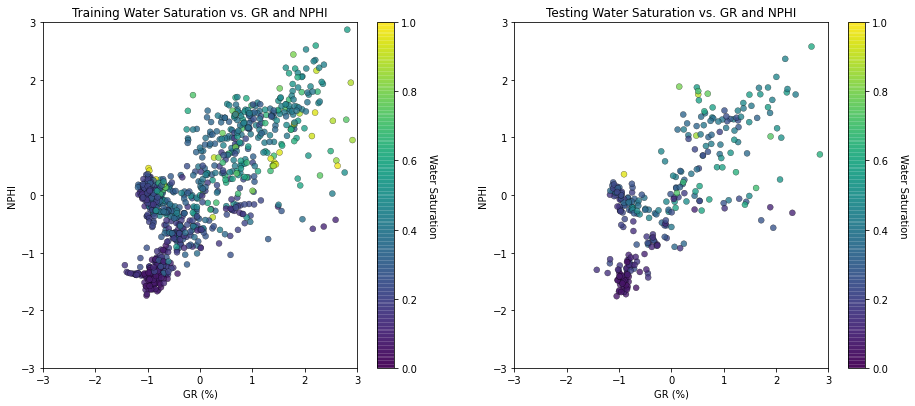

In [8]:
# code taken from Dr. Michael Pyrcz's sample workflow 
plt.subplot(121)
im = plt.scatter(X_train["sGR"],X_train["sTNPH"],s=None, c=y_train['Sw'], marker=None, cmap=None, norm=None, vmin=Swmin, vmax=Swmax, alpha=0.8, linewidths=0.3, edgecolors="black")
plt.title('Training Water Saturation vs. GR and NPHI'); plt.xlabel('GR (%)'); plt.ylabel('NPHI')
plt.xlim(-3,3); plt.ylim(-3,3)
cbar = plt.colorbar(im, orientation = 'vertical')
cbar.set_label("Water Saturation", rotation=270, labelpad=20)

plt.subplot(122)
im = plt.scatter(X_test["sGR"],X_test["sTNPH"],s=None, c=y_test['Sw'], marker=None, cmap=None, norm=None, vmin=Swmin, vmax=Swmax, alpha=0.8, linewidths=0.3, edgecolors="black")
plt.title('Testing Water Saturation vs. GR and NPHI'); plt.xlabel('GR (%)'); plt.ylabel('NPHI')
plt.xlim(-3,3); plt.ylim(-3,3)
cbar = plt.colorbar(im, orientation = 'vertical')
cbar.set_label("Water Saturation", rotation=270, labelpad=20)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.2, hspace=0.2)
plt.show()

The scatter plots show that the test and train coverage area is plausible and can be further used in prediction.From above, there are data points for the gamma ray and neutron porosity in both train and test scatter plots spanning across the reponse feature (water saturation) values from minimum of 0 to maximum of 1. This is a good practice before model training and testing. Now lets instantiate various models.


### 5 - Models Training and Testing

The first predictive machine learning adopted here is the linear regression followed by polynomial regression and k-nearest neighbors.


### Linear Regression Model

Linear regression would be used as base model that assumes linearity (response is a linear combination of features), error independence and error free, constant variance and no multicollinearity. It is used for a supervised learning prediction. It generally  takes the form of $y = \sum_{\alpha = 1}^m b_{\alpha} x_{\alpha} + b_0$ 

It is a simple prediction method that mainly fit and better fit linear relationships.

Now let's estimate and plot Linear Regression Prediction with Training and Testing Data.
We defined a relative error metrics to compare the models in the training and testing. 

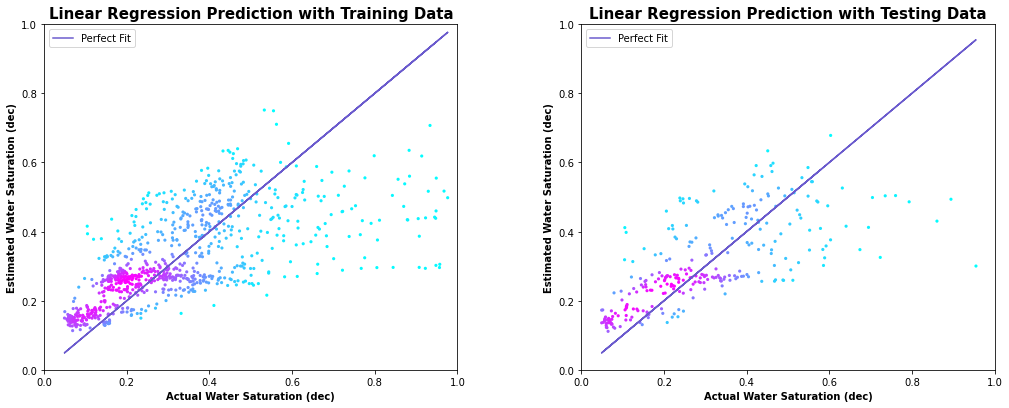

In [11]:
lin_reg = LinearRegression().fit(X_train,y_train['Sw']) # We instantiate linear regression object with no hyperparameters and train the linear regression 
lin_pred = lin_reg.predict(X_test)                             # Then we predict on test data
y_predict = lin_reg.predict(X_train)

error=0
for i in range(len(y_train['Sw'])):
    error+=(abs(y_train['Sw'][i]-y_predict[i])/y_train['Sw'][i])
train_error_linear=error/len(y_train)*100

y_Predict=list(y_test['Sw'])

error=0
for i in range(len(y_test)):
    error+=(abs(y_Predict[i]-lin_pred[i])/y_Predict[i])
test_error_linear=error/len(lin_pred)*100


plt.subplot(121)
xy = np.vstack([y_train['Sw'],lin_reg.predict(X_train)])
z = gaussian_kde(xy)(xy)
plt.scatter(y_train['Sw'],lin_reg.predict(X_train), c=z, cmap="cool", s=10, edgecolor='none')
plt.plot(y_train['Sw'],y_train['Sw'], label = 'Perfect Fit', color ='slateblue')
plt.xlim(0,1); plt.ylim(0,1)
plt.title('Linear Regression Prediction with Training Data', fontsize=15,fontweight='bold')
plt.xlabel('Actual Water Saturation (dec)', fontsize=10,fontweight='bold')
plt.ylabel('Estimated Water Saturation (dec)', fontsize=10,fontweight='bold')
plt.legend()

plt.subplot(122)
xy = np.vstack([y_test['Sw'],lin_pred])
z = gaussian_kde(xy)(xy)
plt.scatter(y_test['Sw'],lin_pred, c=z, cmap="cool", s=10, edgecolor='none')
plt.plot(y_test['Sw'],y_test['Sw'], label = 'Perfect Fit', color ='slateblue')
plt.xlim(0,1); plt.ylim(0,1)
plt.title('Linear Regression Prediction with Testing Data', fontsize=15,fontweight='bold')
plt.xlabel('Actual Water Saturation (dec)', fontsize=10,fontweight='bold')
plt.ylabel('Estimated Water Saturation (dec)', fontsize=10,fontweight='bold')
plt.legend()
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.2, top=1.2, wspace=0.3, hspace=0.2)
plt.show()

While the linear model tried to fit the data,the fit was worse in large water saturation values. Thesame results were imprinted in the testing prediction. The model includes important assumptions about the data, linearity, error independence and no multicollinearity are some of the causes of the uncertainties in linear regression model. Overall it is quite a poor fit.

We decided to better visualize the linear model with a pixel plot function defined earlier to  the fitting and prediction data set. The code below was used to execute the objective.

C:\Users\onr77\Anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\onr77\Anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


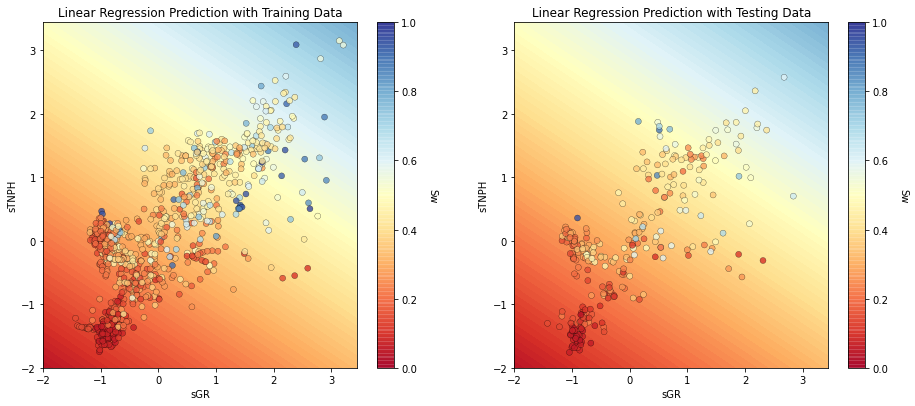

In [12]:
plt.subplot(121)
visualize_model(lin_reg,X_train["sGR"],-2.0,3.5,X_train["sTNPH"],-2.0,3.5,y_train["Sw"],Swmin,Swmax,'Linear Regression Prediction with Training Data')

plt.subplot(122)
visualize_model(lin_reg,X_test["sGR"],-2.0,3.5,X_test["sTNPH"],-2.0,3.5,y_test["Sw"],Swmin,Swmax,'Linear Regression Prediction with Testing Data')
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.2, hspace=0.2)
plt.show()

Although the background shows a smooth graph. There is a huge mismatch  shown by colour variations in both the testing and training data. The blue colours forexample in the training data show over prediction and mismatch. We also have few points that have colourless circles. This showns high model variance in training and testing.

#### Plots of Residual Error at Training and Testing
To check the distribution or error in training and testing, the plots were made to have a feel of homoscedasticity assumption by linear regression. The residual errors were calculated at the training and testing data to see the points and concentrations of error variations within the data.

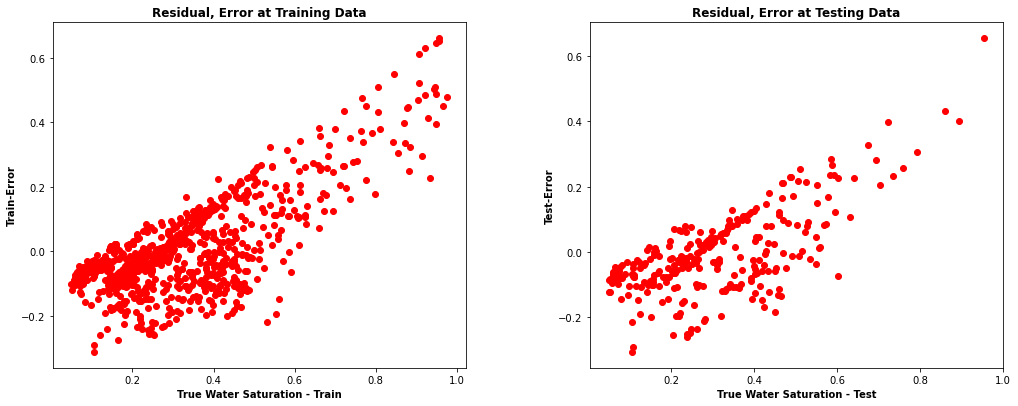

In [13]:
train_error = y_train['Sw'] - lin_reg.predict(X_train)
test_error = y_test['Sw'] - lin_pred

plt.subplot(121)
plt.scatter(y_train,train_error, color = 'red')
plt.title("Residual, Error at Training Data", fontweight='bold'); plt.xlabel('True Water Saturation - Train',fontweight='bold');plt.ylabel('Train-Error', fontweight='bold')

plt.subplot(122)
plt.scatter(y_test,test_error, color = 'red')
plt.title("Residual, Error at Testing Data", fontweight='bold'); plt.xlabel('True Water Saturation - Test',fontweight='bold');plt.ylabel('Test-Error', fontweight='bold')

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.2, top=1.2, wspace=0.3, hspace=0.2)
plt.show()

The plots clearly shows the model errors at the training and testing. The errors were much concentrated at the lower saturation values because the bulk of the data was taken at producing zone of the reservoir with lower water saturation. This also shows the lack of flexibility in linear regression models to predict for lower water saturation values.

There is no hyperparameter tuning is linear regression. Therefore, this is the optimum prediction.

Now with the inability of linear regression to predict non-linear data relationships, let's make some nonlinear predictions by starting with polynomial regression. It will gain some complexity to fit non-linear patterns and gain predictive model complexity and flexibility.

### Polynomial Regression 

Polynomial regression will add complexity and flexibility to capture the non-linearity in the model using basis expansion.
Polynomial regression will fit the non-linear phenomenon, even though we run through the risk of:

* **higher model variance**
* **instability in interpolation and extrapolation**
* **sensitivity to outliers**
* **losing coefficient interpretability**

it improves flexibility in prediction. Although polynomial regression comes with issues but it is able to expand the dimensionality of the problem with functions of the original features, but still use linear methods on the transformed features.

Pipeline was used to improve the simplify the code and avoid data leakage. Here, we do not need to first perform basis expansion and further train the resulting linear model.

We begin by instantiating a fit on the training data and testing on the withheld dataset. At first we use an arbitrary order number.The results are shown in the Plots of Trained and Tested Polynomial Model of any Order.

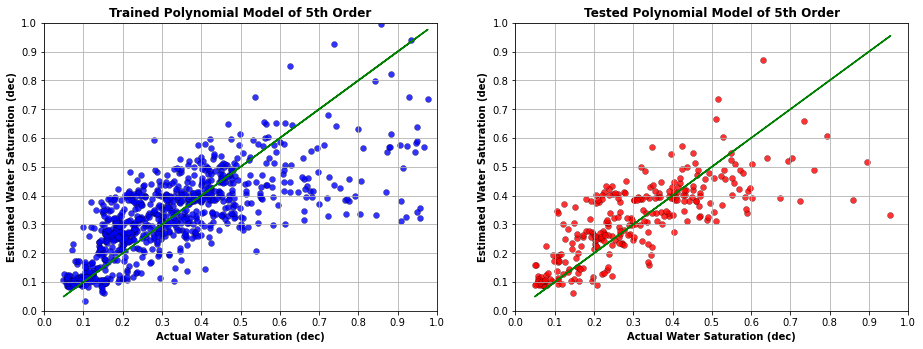

In [17]:
order=5                                                 # set the polynomial order
polyreg=make_pipeline(PolynomialFeatures(order),LinearRegression()) # make the modeling pipeline
polyreg.fit(X_train, y_train)    # fit the model to the data
Sw_pred_test = polyreg.predict(X_test) # predict with the modeling pipeline
Sw_pred_train = polyreg.predict(X_train) # predict with the modeling pipeline

plt.subplot(121)
plt.axis([0,1,0,1])
plt.scatter(y_train,Sw_pred_train,s=None, c='blue', alpha=0.8, linewidths=0.3, edgecolors="black")
plt.plot(y_train,y_train,color = 'green')
plt.grid(True)
plt.title('Trained Polynomial Model of 5th Order', fontsize=12,fontweight='bold')
plt.xlabel('Actual Water Saturation (dec)', fontsize=10,fontweight='bold')
plt.ylabel('Estimated Water Saturation (dec)', fontsize=10,fontweight='bold')
plt.xticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
plt.yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

plt.subplot(122)
plt.axis([0,1,0,1])
plt.plot(y_test,y_test,color = 'green')
plt.scatter(y_test,Sw_pred_test,s=None, c='red', alpha=0.8, linewidths=0.3, edgecolors="black")
plt.grid(True)
plt.title('Tested Polynomial Model of 5th Order', fontsize=12,fontweight='bold')
plt.xlabel('Actual Water Saturation (dec)', fontsize=10,fontweight='bold')
plt.ylabel('Estimated Water Saturation (dec)', fontsize=10,fontweight='bold')
plt.xticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
plt.yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
    
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2)
plt.show()

The graph above showed that the polynomial regression  would have have a better fit and a much more flexible method to predict nonlinear relationships. At the training and testing, the data rallied around the perfect fit. Since the order was arbitrary, we would be rather comprehensive and critical in our analysis by performing hyperparameters tuning to better train the model parameters and predict on the testing dataset. Let's perform hyperparameter tuning.

#### Order Hyperparameter Tuning

Order was adopted as the hyperparameter for the Polynomial regression
* To visualize the range of complexity and flexibility in prediction compared to Linear regression 
* Optimum hyperparameter will be picked after this step
The code below was taken from Dr. Pyrcz's workflow  [GitHub](https://github.com/GeostatsGuy) edits were done  to fit the project purpose.

After hyperparameter execution, we would compare the trend of the mean square error and variance in linear and polynomial Regression and visualize them in plots of Testing MSE and Variance Explained vs. Order Hyperparameter. 

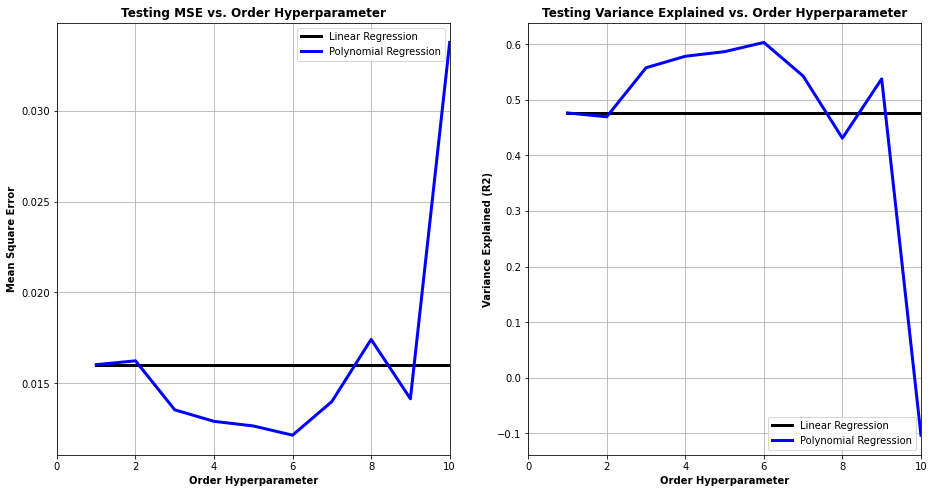

In [18]:
nbins = 1000                                               # number of bins
orders = [1,2,3,4,5,6,7,8,9,10]                           # assign equal bins in log space
polyreg_error = []; linear_error = []
polyreg_r2 = []; linear_r2 = []

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train) # fit model
linear_predict = linear_reg.predict(X_test)
linear_err = metrics.mean_squared_error(y_test["Sw"],linear_predict)
linear_r = metrics.r2_score(y_test["Sw"],linear_predict)

index = 0
for order in orders:
    polyreg=make_pipeline(PolynomialFeatures(order),LinearRegression()) # make the modeling pipeline
    polyreg.fit(X_train, y_train)    # fit the model to the data
    polyreg_predict = polyreg.predict(X_test) # predict with the modeling pipeline
    polyreg_error.append(metrics.mean_squared_error(y_test["Sw"],polyreg_predict))
    polyreg_r2.append(metrics.r2_score(y_test["Sw"],polyreg_predict))
    linear_error.append(linear_err)
    linear_r2.append(linear_r)
    index = index + 1
    
color = ['black','blue','green','red','orange','grey']

plt.subplot(121)
plt.plot(orders,linear_error, label = 'Linear Regression', c = 'black', linewidth = 3.0)
plt.plot(orders,polyreg_error, label = 'Polynomial Regression', c = 'blue', linewidth = 3.0)
plt.title('Testing MSE vs. Order Hyperparameter', fontweight = 'bold'); plt.xlabel('Order Hyperparameter', fontweight = 'bold'); plt.ylabel('Mean Square Error', fontweight = 'bold')
plt.xlim(0,10); 
plt.grid(); 
plt.legend(loc = 'upper right')

plt.subplot(122)
plt.plot(orders,linear_r2, label = 'Linear Regression', c = 'black', linewidth = 3.0)
plt.plot(orders,polyreg_r2, label = 'Polynomial Regression', c = 'blue', linewidth = 3.0)
plt.title('Testing Variance Explained vs. Order Hyperparameter', fontweight = 'bold'); plt.xlabel('Order Hyperparameter', fontweight = 'bold'); plt.ylabel('Variance Explained (R2)', fontweight = 'bold')
plt.xlim(0,10); 
plt.grid(); 
plt.legend(loc = 'lower right')

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.5, wspace=0.2, hspace=0.2)
plt.show()

The mean squared error and variance explained were the performance metrics for the hyperparameter tuning. The graph above showed that the order hyperparameter significantly reduced the mean squared error at the 6th order. Above that the model converges to a linear model and performs worse at higher order due to overfit possibilities. The variance explained at this order is the highest. It follows from the higher model variance of the polynomial regression, where we have to trade accuracy for variance.

We would go ahead and use the optimum order of 6.

#### Prediction and Plots of Test Data Using Optimum Order Hyperparameter
From the graph of Testing MSE and Variance Explained vs. Order Hyperparameter,the optimal order existed at the minimum mean square error but maximum variance explained.

Concurrently we would visualize by making a plot of optimum regression model.

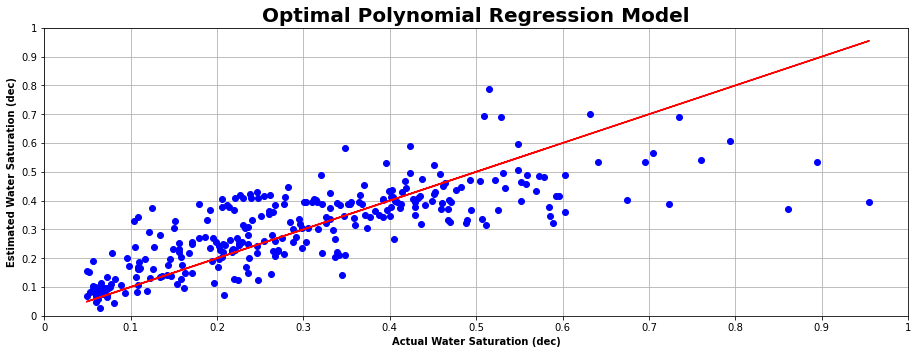

In [19]:
order=6                                                 # set the optimum polynomial order
polyreg=make_pipeline(PolynomialFeatures(order),LinearRegression()) # make the modeling pipeline
polyreg_opt=polyreg.fit(X_train, y_train['Sw'])    # fit the model to the data
Sw_pred_optpoly = polyreg.predict(X_test) # predict with the modeling pipeline
y_predict =  polyreg.predict(X_train)

error=0
for i in range(len(y_train['Sw'])):
    error+=(abs(y_train['Sw'][i]-y_predict[i])/y_train['Sw'][i])
train_error_polynomial=float(error/len(y_train)*100)

y_Predict=list(y_test['Sw'])

error=0
for i in range(len(y_test)):
    error+=(abs(y_Predict[i]-Sw_pred_optpoly[i])/y_Predict[i])
test_error_polynomial=float(error/len(y_test)*100)

fig, ax = plt.subplots()
ax.axis([0,1,0,1])
ax.plot(y_test,Sw_pred_optpoly, 'bo')
ax.plot(y_test,y_test, 'r')
ax.grid(True)
plt.title('Optimal Polynomial Regression Model', fontsize=20,fontweight='bold')
ax.set_xlabel('Actual Water Saturation (dec)', fontsize=10,fontweight='bold')
ax.set_ylabel('Estimated Water Saturation (dec)', fontsize=10,fontweight='bold')
ax.set_xticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
ax.set_yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

#Format the axes so that they show whole numbers
for axis in [ax.yaxis, ax.xaxis]:
    formatter = FuncFormatter(lambda y, _: '{:.16g}'.format(y))
    axis.set_major_formatter(formatter)
    
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2)
plt.show()

The polynomial regression performed better than the linear regression model as shown in the graph above. It was able to capture the flexibility in the nonlinear phenomenon with linear analysis. Although it has significantly higher model variance. 

We can therefore adopt this model to model complex variable relationships with the concept of basis expansion while keeping the limitations in mind.

While the polynomial regression has done some justice in fitting and predicting nonlinear phenomenon, we might want to further test other complex models on our dataset. Here, we would use a non parametric method that makes no assumption about the functional form of the relationships. k-nearest neighbours modeling was highlighted below.

### $k$ Nearest Neighbour

K-nearest Neighbors algorithm’s non-parametric attribute adds more flexibility to fit a wider variety of shapes for the function. This helps link variance-bias trade off after tuning the hyperparameter between the uniform, inverse distance weighting and the optimal number of neighbors.


* instantiate it with the hyperparameters, $k$ nearest neighbours 

* train with the training data, we use the standard fit function from scikit learn 

The hyperparameters, weights = 'uniform' or 'distance', n_neighbours = maximum number of neighbours and p = distance metric power were set randomly to uniform, 5 and 1 respectively.

We begin by training and testing with random hyperparameters and see the Plot of the K Nearest Neighbour Prediction with Training and Testing Data. 

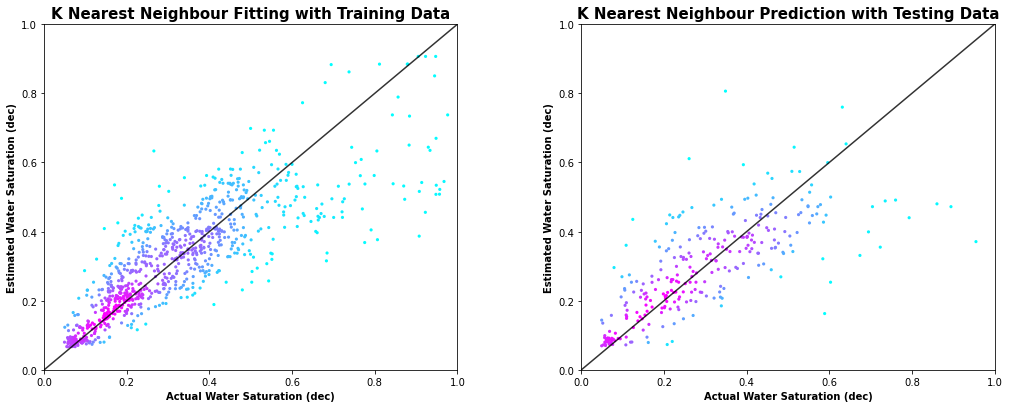

In [20]:
knn = KNeighborsRegressor(weights = 'uniform', n_neighbors=5, p = 1) # instantiate the prediction model
knn_fit = knn.fit(X_train,y_train['Sw'])              # train the model with the training data
knn_pred_train = knn.predict(X_train) 
knn_pred_test = knn.predict(X_test) 

plt.subplot(121)
xy = np.vstack([y_train['Sw'],knn_pred_train])
z = gaussian_kde(xy)(xy)
plt.scatter(y_train['Sw'],knn_pred_train, c=z, cmap="cool", s=10, edgecolor='none')
lims = [np.min([ax.get_xlim(), ax.get_ylim()]),np.max([ax.get_xlim(), ax.get_ylim()])]
plt.plot(lims, lims, 'k-', alpha=0.8, zorder=1)
plt.xlim(0,1); plt.ylim(0,1)
plt.title('K Nearest Neighbour Fitting with Training Data', fontsize=15,fontweight='bold')
plt.xlabel('Actual Water Saturation (dec)', fontsize=10,fontweight='bold')
plt.ylabel('Estimated Water Saturation (dec)', fontsize=10,fontweight='bold')

plt.subplot(122)
xy = np.vstack([y_test['Sw'],knn_pred_test])
z = gaussian_kde(xy)(xy)
plt.scatter(y_test['Sw'],knn_pred_test, c=z, cmap="cool", s=10, edgecolor='none')
lims = [np.min([ax.get_xlim(), ax.get_ylim()]),np.max([ax.get_xlim(), ax.get_ylim()])]
plt.plot(lims, lims, 'k-', alpha=0.8, zorder=1)
plt.xlim(0,1); plt.ylim(0,1)
plt.title('K Nearest Neighbour Prediction with Testing Data', fontsize=15,fontweight='bold')
plt.xlabel('Actual Water Saturation (dec)', fontsize=10,fontweight='bold')
plt.ylabel('Estimated Water Saturation (dec)', fontsize=10,fontweight='bold')
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.2, top=1.2, wspace=0.3, hspace=0.2)
plt.show()

Awesome!!! The use of the arbitrary numbers for the hyperparameter at the initial fitting at the training data and predictions at the testing data gives us some potential that k-nearest neighbours would do a great job in modelling the nonlinear phenomenon.

Let's go better model this by performing hyperparameter tuning and better picking the optimum values at the best accuracy in testing.

#### Tuning the Hyperparameters

Checking multiple $k$ nearest neighbours for average and inverse distance estimates to access the best hyperparameters 
with respect to accuracy in testing [GitHub](https://github.com/GeostatsGuy). Edits were made to fit the demonstration. After the tuning we will plot the testing error against the nearest and select the optimum numbers.

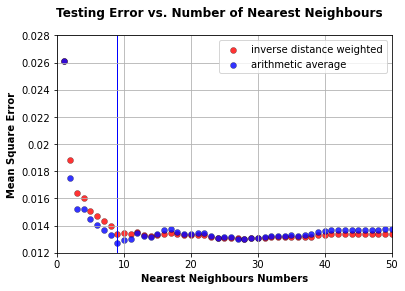

In [21]:
# code taken from Michael Pyrcz's sample workflow
k = 1
dist_error = []
unif_error = []
k_mat = np.linspace(1,50,50)
while k <= 50:
    neigh_dist = KNeighborsRegressor(weights = 'distance', n_neighbors=k, p = 1)
    neigh_dist_fit = neigh_dist.fit(X_train,y_train['Sw'])    # train the model with the training data
    y_pred = neigh_dist_fit.predict(X_test)
    MSE = metrics.mean_squared_error(y_test,y_pred)
    dist_error.append(MSE)
    
    neigh_unif = KNeighborsRegressor(weights = 'uniform', n_neighbors=k, p = 1)
    neigh_unif_fit = neigh_unif.fit(X_train,y_train['Sw'])    # train the model with the training data
    y_pred = neigh_unif_fit.predict(X_test)
    MSE = metrics.mean_squared_error(y_test,y_pred)
    unif_error.append(MSE)
    k = k + 1
    
fig, ax = plt.subplots()
ax.axis([0,50,0.012,0.028])
plt.arrow(9,0,0,1500000,width=0.02,color='blue',head_length=0.0,head_width=0.0)
ax.scatter(k_mat,dist_error,s=None, c='red',label = 'inverse distance weighted', marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.8, linewidths=0.3, edgecolors="black")
ax.scatter(k_mat,unif_error,s=None, c='blue',label = 'arithmetic average', marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.8, linewidths=0.3, edgecolors="black")
ax.grid(True)
fig.suptitle('Testing Error vs. Number of Nearest Neighbours', fontsize=12,fontweight='bold')
ax.set_xlabel('Nearest Neighbours Numbers', fontsize=10,fontweight='bold')
ax.set_ylabel('Mean Square Error', fontsize=10,fontweight='bold')
ax.set_xticks([0,10,20,30,40,50])
ax.set_yticks([0.012,0.014,0.016,0.018,0.020,0.022,0.024,0.026,0.028])
plt.legend()

#Format the axes so that they show whole numbers
for axis in [ax.yaxis, ax.xaxis]:
    formatter = FuncFormatter(lambda y, _: '{:.16g}'.format(y))
    axis.set_major_formatter(formatter)

From the plot of Testing Error vs. Number of Nearest Neighbours, the optimum number of neighbours for both Inverse distance weighted and uniform algorithm occurred at the minimum mean square (n_neighbors = 9). We can further use k-fold cross validation to firm up our claim. 

#### k-fold Cross Validation

Observing the accuracy vs. complexity trade-off to evaluate the performance of our model. Inverse distance algorithm is much more robust and therefore was used in the k-fold Cross Validation. 

The code below was used to loop over multiple nearest neighbours while concurrently calculating the means squared error. The resulting distribution is shown on the plot of k-fold Cross Validation Error (MSE) vs. k Nearest Neighbours 

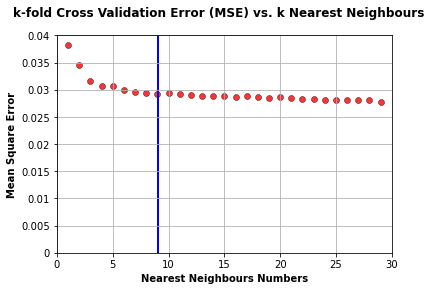

In [22]:
# code modified from Michael Pyrcz's sample workflow
score = []                                                  # code modified from StackOverFlow by Dimosthenis
k_mat = []
for k in range(1,30):
    neigh_dist = KNeighborsRegressor(weights = 'uniform', n_neighbors=k, p = 1)
    scores = cross_val_score(estimator=neigh_dist, X= np.c_[projectdata['sGR'],projectdata['sTNPH']],y=projectdata['Sw'], cv=5, n_jobs=4,scoring = "neg_mean_squared_error") # Perform 7-fold cross validation
    score.append(abs(scores.mean()))
    k_mat.append(k)
    
fig, ax = plt.subplots()
ax.axis([0,30,0,0.040])
plt.arrow(9,0,0,1500000,width=0.02,color='blue',head_length=0.0,head_width=0.0)
ax.scatter(k_mat,score,s=None, c="red", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.8, linewidths=0.5, edgecolors="black")
ax.grid(True)
fig.suptitle('k-fold Cross Validation Error (MSE) vs. k Nearest Neighbours', fontsize=12,fontweight='bold')
ax.set_xlabel('Nearest Neighbours Numbers', fontsize=10,fontweight='bold')
ax.set_ylabel('Mean Square Error', fontsize=10,fontweight='bold')
ax.set_xticks([0,5,10,15,20,25,30])
ax.set_yticks([0,0.005,0.010,0.015,0.020,0.025,0.030,0.035,0.040])

#Format the axes so that they show whole numbers
for axis in [ax.yaxis, ax.xaxis]:
    formatter = FuncFormatter(lambda y, _: '{:.16g}'.format(y))
    axis.set_major_formatter(formatter)

The k-fold validation better affirms 9 nearest neighbours as a good accuracy in model testing. While higher order gives a much smaller mean square error according to the graph, it is best to go with 9 to avoid overfitting the training data set.

#### Instantiate a fit with Optimal hyperparameters
From the plot of k-fold Cross Validation Error (MSE) vs. k Nearest Neighbours, the optimum number of neighbours for uniform weighted algorithm occurred at the minimum mean square (n_neighbors = 9. Increasing the number of neighbors will like cause overfit.

The optimal numbers were adopted and further used to predict on the testing data as shown in the Plot of the K Nearest Neighbour Prediction with Training and Testing Data (Optimal Hyperparameter) 

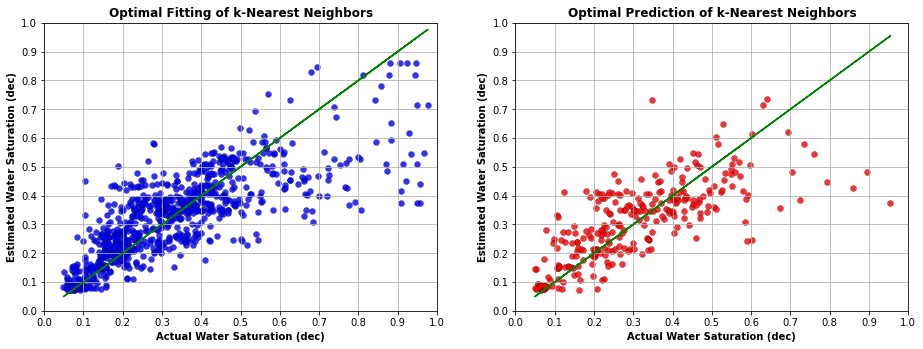

In [23]:
knn_opt = KNeighborsRegressor(weights = 'uniform', n_neighbors=10, p = 1)
knn_opt = knn_opt.fit(X_train,y_train['Sw'])              # train the model with the training data
knn_pred_train = knn_opt.predict(X_train) 
knn_pred_test = knn_opt.predict(X_test) 
y1_knn=list(knn_pred_train)

error=0
for i in range(len(y_train['Sw'])):
    error+=(abs(y1_knn[i]-y_train['Sw'][i])/y_train['Sw'][i])
train_error_knn=error/len(y_train['Sw'])*100

y2_knn=list(knn_pred_test)
error=0
for i in range(len(y_test['Sw'])):
    error+=(abs(y2_knn[i]-y_test['Sw'][i])/y_test['Sw'][i])
test_error_knn=error/len(y_test['Sw'])*100


plt.subplot(121)
plt.axis([0,1,0,1])
plt.scatter(y_train,knn_pred_train,s=None, c='blue', alpha=0.8, linewidths=0.3, edgecolors="black")
plt.plot(y_train,y_train,color = 'green')
plt.grid(True)
plt.title('Optimal Fitting of k-Nearest Neighbors', fontsize=12,fontweight='bold')
plt.xlabel('Actual Water Saturation (dec)', fontsize=10,fontweight='bold')
plt.ylabel('Estimated Water Saturation (dec)', fontsize=10,fontweight='bold')
plt.xticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
plt.yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

plt.subplot(122)
plt.axis([0,1,0,1])
plt.plot(y_test,y_test,color = 'green')
plt.scatter(y_test,knn_pred_test,s=None, c='red', alpha=0.8, linewidths=0.3, edgecolors="black")
plt.grid(True)
plt.title('Optimal Prediction of k-Nearest Neighbors', fontsize=12,fontweight='bold')
plt.xlabel('Actual Water Saturation (dec)', fontsize=10,fontweight='bold')
plt.ylabel('Estimated Water Saturation (dec)', fontsize=10,fontweight='bold')
plt.xticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
plt.yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

#Format the axes so that they show whole numbers
for axis in [ax.yaxis, ax.xaxis]:
    formatter = FuncFormatter(lambda y, _: '{:.16g}'.format(y))
    axis.set_major_formatter(formatter)
    
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2)
plt.show()

From the graph above, we can qualitatively conclude that the k-nearest neighbours predictive model performed better than the linear and polynomial regression modelling at training and testing. This is due to the fact it makes no assumption about the functional shape and its ability to fit a variety of shapes.The uniform method has performed better here due to its insensitivity to distance of training data from estimated location. We would further compare the models quantitatively at the end of the workflow.

#### 2D Pixel Plot 

To show the smoothness and roughness of the  k-nearest neighbour fitting and prediction on the predictors, below is the code than can be used. The code fits, predicts and plots in one go from earlier defined function.

C:\Users\onr77\Anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\onr77\Anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


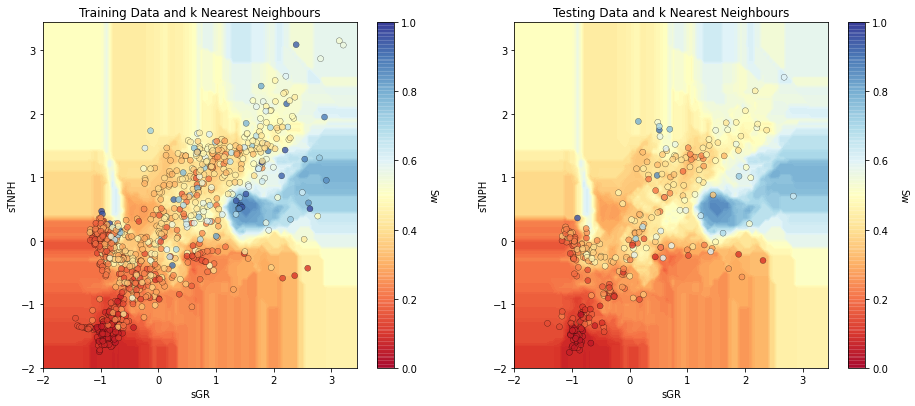

In [24]:
plt.subplot(121)
visualize_model(knn_opt,X_train["sGR"],-2.0,3.5,X_train["sTNPH"],-2.0,3.5,y_train["Sw"],Swmin,Swmax,'Training Data and k Nearest Neighbours')

plt.subplot(122)
visualize_model(knn_opt,X_test["sGR"],-2.0,3.5,X_test["sTNPH"],-2.0,3.5,y_test["Sw"],Swmin,Swmax,'Testing Data and k Nearest Neighbours')
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.2, hspace=0.2)
plt.show()

The pixel plot shows a lower variance and mismatch of data in fitting and predicting the test dataset. Distances in feature space are both sensitive to changes in gamma ray and neutron porosity. The predicted colours fit well with the background colours with few mismatch in training and testing.We can confirm that k-nearest neighbors did a good modeling job to this nonlinear relationship.

Lets qualitative compare all the phenomenon with a histogram plot of train and test errors.

### 9 - Analysis of Results
The three prediction methods used to test for linearity were compared to see the differences using the relative error in percentage. The resulting data is shown in the comparison error performance of the prediction of linear and polynomial regression and $k$ Nearest Neighbours.

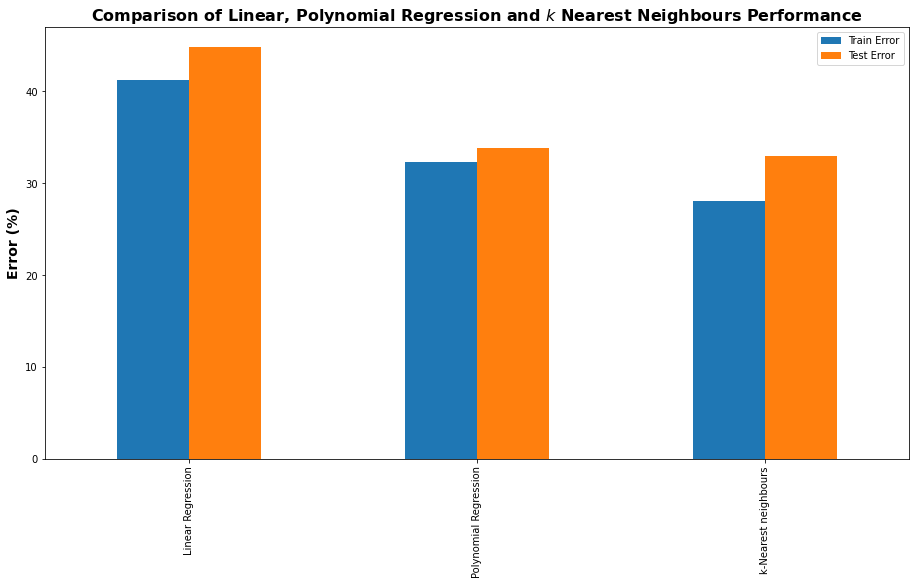

In [25]:
train_error=[train_error_linear,train_error_polynomial,train_error_knn]    # put train and test error into a dataframe
test_error=[test_error_linear,test_error_polynomial,test_error_knn]

col={'Train Error':train_error,'Test Error':test_error}
models=['Linear Regression','Polynomial Regression','k-Nearest neighbours']
df=DataFrame(data=col,index=models)
df.plot(kind='bar')
plt.ylabel('Error (%)', fontsize=14,fontweight='bold')
plt.title('Comparison of Linear, Polynomial Regression and $k$ Nearest Neighbours Performance', fontsize=16,fontweight='bold')
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.5, wspace=0.2, hspace=0.2)
plt.show()

The figure above further affirm our justification of non-linear models performing better than linear models at predicting nonlinear relationships. Overall, the k-Nearest Neighbors performed the best. Linear models are quite a poor fit for these multivariate relationships due to the assumptions earlier stated.
* **linearity** (response is a linear combination of features), 
* **error independence and error free**, 
* **constant variance** and 
* **no multicollinearity**


With that said, we can show the fit in a simple linear regression to fit a linear relationship as demonstrated below.

### Demonstration of Linear Models

Using other variables in thesame open data source from a field in Australia. The dataset is publicly available [here](https://github.com/Yomzysteez/project/blob/main/project.csv/)  

We will show a case in which Linear Regression perfectly works with the following features:

* **Gamma Ray** - electromagnetic radiation of the shortest wavelength and highest energy in units of API (Predictor feature)
* **Vshale** - volume of shale in a given volume of rock.

Vshale generally varies linearly gamma ray. Let's demonstrate it with the model below.


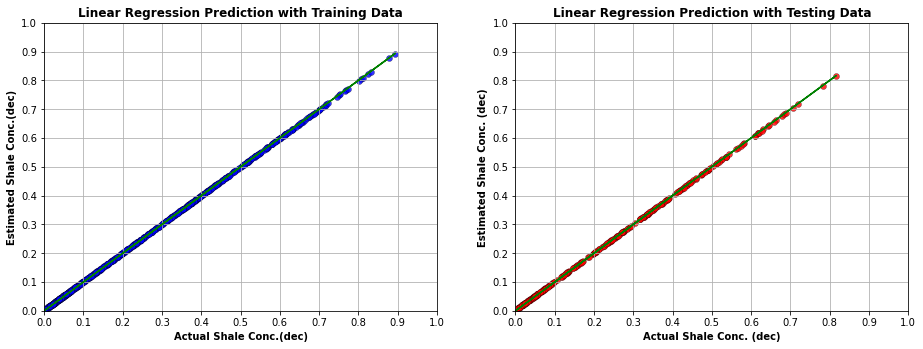

In [26]:
Xlin = projectdata.loc[:, ["GR"]]
ylin = projectdata.loc[:, ["Vsh"]]
Xlin_train, Xlin_test, ylin_train, ylin_test = train_test_split(Xlin,ylin, test_size=0.25, random_state=13)
lin_reg = LinearRegression().fit(Xlin_train,ylin_train) # We instantiate linear regression object with no hyperparameters and train the linear regression 
lin_pred = lin_reg.predict(Xlin_test)                             # Then we predict on test data
y_predict = lin_reg.predict(Xlin_train)

plt.subplot(121)
plt.axis([0,1,0,1])
plt.scatter(ylin_train,y_predict,s=None, c='blue', alpha=0.8, linewidths=0.3, edgecolors="black")
plt.plot(ylin_train,ylin_train,color = 'green')
plt.grid(True)
plt.title('Linear Regression Prediction with Training Data', fontsize=12,fontweight='bold')
plt.xlabel('Actual Shale Conc.(dec)', fontsize=10,fontweight='bold')
plt.ylabel('Estimated Shale Conc.(dec)', fontsize=10,fontweight='bold')
plt.xticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
plt.yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

plt.subplot(122)
plt.axis([0,1,0,1])
plt.plot(ylin_test,ylin_test,color = 'green')
plt.scatter(ylin_test,lin_pred,s=None, c='red', alpha=0.8, linewidths=0.3, edgecolors="black")
plt.grid(True)
plt.title('Linear Regression Prediction with Testing Data', fontsize=12,fontweight='bold')
plt.xlabel('Actual Shale Conc. (dec)', fontsize=10,fontweight='bold')
plt.ylabel('Estimated Shale Conc. (dec)', fontsize=10,fontweight='bold')
plt.xticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
plt.yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

#Format the axes so that they show whole numbers
for axis in [ax.yaxis, ax.xaxis]:
    formatter = FuncFormatter(lambda y, _: '{:.16g}'.format(y))
    axis.set_major_formatter(formatter)
    
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2)
plt.show()

Hurray!!! The results above show a perfect fit in the training and awesome predicting in the testing data. Here, the linearity assumptions work perfectly and an example of the situation in which linear models work well has been demonstrated.

### Observation

Unlike Linear Regression, Polynomial Regression and $k$ Nearest Neighbour are both quite flexible and able to fit nonlinear response patterns in the predictor feature space. 

Definitely, linear models perfectly fit linear phenomenon as demonstrated above while nonlinear models would perform better in nonlinear relationships.

Polynomial regression was able to demonstrate that by the use of basis function we can gain predictive model complexity and flexible, not without their high model variance limitation but does a better job than linear regression in fitting nonlinear dataset.

k-nearest neighbours were also to show that they can:

* work with nonparametric prediction.

* extol tuning of hyperparameters to demonstrate complexity.

* make predictions by analysing the accuracy - complexity trade-off.

### Parting Comments 


* I have over 5 years of experience working as a Production and Reservoir Engineering with TEPNG, Exxonmobil and Oil Servicing companies. 

* I presently work as a Research Assistant at the University of Texas at Austin on "Applications of data science and machine learning to formation evaluation", while concurrently doing my PhD in Petroleum Geosystems Engineering. 

* I have verse coding experience with C/C++, Python programming which I have used large to achieve objectives during my professional experiences.

* I  seek internship and full time positions. I am confident that I am well equipped to undertake duties in the organization and contribute my quota to the realization of the organizational goals and objectives.

* I can be reached at oriyomiraheem@utexas.edu.



I hope this was helpful,

*Oriyomi Raheem*

___________________

#### Work Supervised by:

### Michael Pyrcz, Associate Professor, University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PIs including Profs. Foster, Torres-Verdin and van Oort)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Associate Professor The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin
